In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_titanic = pd.read_csv("C:/Users/dkfka/train.csv")
df_titanic.head(3)
print('\n ### Train Data Info ###  \n')
print(df_titanic.info())



 ### Train Data Info ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [3]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
df_titanic['Age_cat'] = df_titanic['Age'].apply(lambda x : get_category(x))

<Figure size 720x432 with 0 Axes>

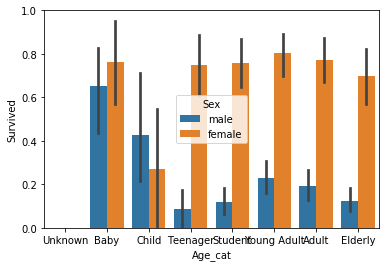

In [4]:
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=df_titanic, order=group_names)

In [5]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# Label Encoding. 
def encode_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = encode_features(df)
    return df

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc


#1. 학습/테스트 데이터 분할
#2. Decision Tree Classifier 객체 생성
#3. 학습/예측/평가


df_titanic = pd.read_csv("C:/Users/dkfka/train.csv")
df_test = pd.read_csv("C:/Users/dkfka/test.csv")

In [16]:
len(df_titanic)
len(df_test)

418

In [18]:
df_titanic.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [12]:
# 컬럼 합치기  / 합칠려면 저렇게 해라~~ 이런 방법이 있당!!

# df_titanic['type'] = 'Train'
# df_test['type'] = 'Test'

In [13]:
df_total = pd.concat([df_titanic,df_test])

C:\Users\dkfka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [14]:
# df_total # 합칠려면!!^^

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,type
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Train
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Train
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Train
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Train
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Train
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Train


In [15]:
# len(df_total)

1309

In [ ]:
#짤라내는 방법   : iloc 사용!!
  
df_titanic = df_total.iloc

In [19]:
train=df_titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test=df_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
total = [train,test]

# train.shape, test.shape


In [21]:
train.shape

(891, 8)

In [22]:
test.shape

(418, 7)

In [25]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [26]:
train[train['Age'].isnull()].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q


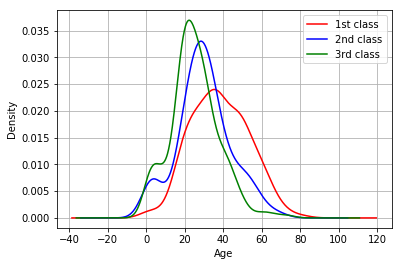

In [27]:
train[train.Pclass==1].Age.plot(kind='kde', color='r', label='1st class')
train[train.Pclass==2].Age.plot(kind='kde', color='b', label='2nd class')
train[train.Pclass==3].Age.plot(kind='kde', color='g',label='3rd class')
plt.xlabel('Age')
plt.legend(loc='best')
plt.grid()

In [28]:
def fill_missing_age(dataset):
    for i in range(1,4):
        median_age=dataset[dataset["Pclass"]==i]["Age"].median()
        dataset["Age"]=dataset["Age"].fillna(median_age)
        return dataset

In [30]:
train = fill_missing_age(train)
train[train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


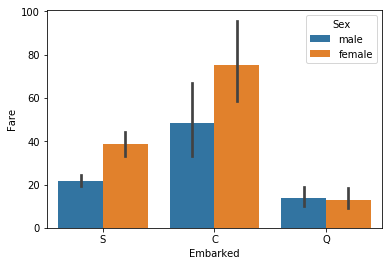

In [32]:
sns.barplot(x="Embarked", y="Fare", hue="Sex", data=train)

In [33]:
train["Embarked"] = train["Embarked"].fillna('C')


In [35]:
test.isnull().sum()
test[test['Age'].isnull()].head()



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
10,3,male,NaN,0,0,7.8958,S
22,1,female,NaN,0,0,31.6833,S
29,3,male,NaN,2,0,21.6792,C
33,3,female,NaN,1,2,23.4500,S
36,3,female,NaN,0,0,8.0500,S


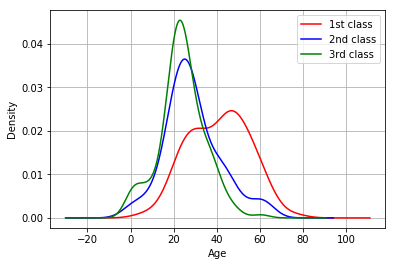

In [36]:
test[test.Pclass==1].Age.plot(kind='kde', color='r', label='1st class')
test[test.Pclass==2].Age.plot(kind='kde', color='b', label='2nd class')
test[test.Pclass==3].Age.plot(kind='kde', color='g',label='3rd class')
plt.xlabel('Age')
plt.legend(loc='best')
plt.grid()


In [37]:
test = fill_missing_age(test)

## Fare missing cases 
test[test['Fare'].isnull()]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [38]:
def fill_missing_fare(dataset):
    median_fare=dataset[(dataset["Pclass"]==3) & (dataset["Embarked"]=="S")]["Fare"].median()
    dataset["Fare"]=dataset["Fare"].fillna(median_fare)
    return dataset

test = fill_missing_fare(test)



In [83]:
train.isnull().any()
test.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

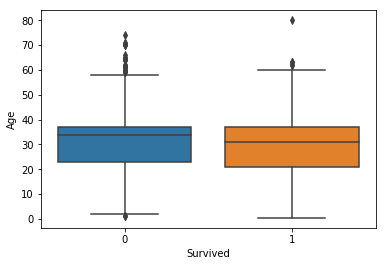

In [46]:
sns.boxplot(x=train["Survived"], y=train["Age"])

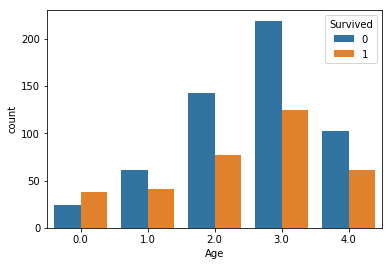

In [47]:
for dataset in total:
    dataset.loc[dataset["Age"] <= 9, "Age"] = 0
    dataset.loc[(dataset["Age"] > 9) & (dataset["Age"] <= 19), "Age"] = 1
    dataset.loc[(dataset["Age"] > 19) & (dataset["Age"] <= 29), "Age"] = 2
    dataset.loc[(dataset["Age"] > 29) & (dataset["Age"] <= 39), "Age"] = 3
    dataset.loc[(dataset["Age"] > 29) & (dataset["Age"] <= 39), "Age"] = 3
    dataset.loc[dataset["Age"] > 39, "Age"] = 4
sns.countplot(x="Age", data=train, hue="Survived")


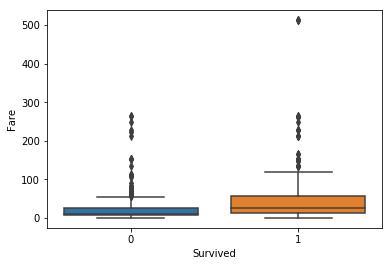

In [48]:
sns.boxplot(x=train["Survived"], y=train["Fare"])

In [49]:

pd.qcut(train["Fare"], 8).value_counts()

(-0.001, 7.75]       140
(9.841, 14.454]      113
(69.488, 512.329]    112
(24.479, 31.0]       112
(7.91, 9.841]        111
(31.0, 69.488]       110
(14.454, 24.479]     110
(7.75, 7.91]          83
Name: Fare, dtype: int64

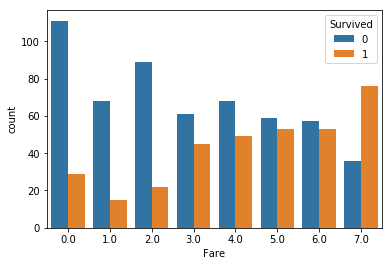

In [50]:

for dataset in total:
    dataset.loc[dataset["Fare"] <= 7.75, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.75) & (dataset["Fare"] <= 7.91), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 9.841), "Fare"] = 2
    dataset.loc[(dataset["Fare"] > 9.841) & (dataset["Fare"] <= 14.454), "Fare"] = 3   
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 24.479), "Fare"] = 4
    dataset.loc[(dataset["Fare"] >24.479) & (dataset["Fare"] <= 31), "Fare"] = 5   
    dataset.loc[(dataset["Fare"] > 31) & (dataset["Fare"] <= 69.487), "Fare"] = 6
    dataset.loc[dataset["Fare"] > 69.487, "Fare"] = 7    
    
sns.countplot(x="Fare", data=train, hue="Survived")


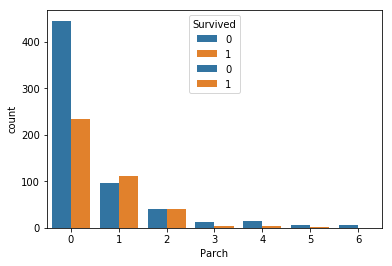

In [51]:
sns.countplot(x="SibSp", data=train, hue="Survived")


## Countplot for the number of parents/childrens
sns.countplot(x="Parch", data=train, hue="Survived")


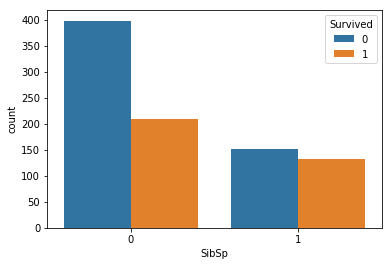

In [52]:
for dataset in total:
    dataset.loc[dataset["SibSp"]==0, "SibSp"]=0
    dataset.loc[dataset["SibSp"]!=0, "SibSp"]=1

sns.countplot(x="SibSp", data=train, hue="Survived")


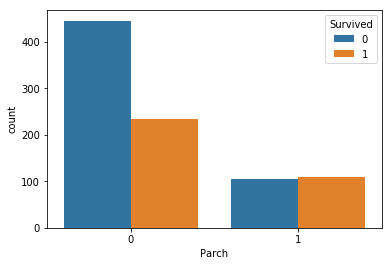

In [53]:
for dataset in total:
    dataset.loc[dataset["Parch"]==0, "Parch"]=0
    dataset.loc[dataset["Parch"]!=0, "Parch"]=1
    
sns.countplot(x="Parch", data=train, hue="Survived")




In [54]:
sex = {'female':0,'male':1}
embarked = {'C':0,'Q':1,'S':2}   


In [55]:
for dataset in total:
    dataset['Sex'] = dataset['Sex'].map(sex)
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2.0,1,0,0.0,2
1,1,1,0,3.0,1,0,7.0,0
2,1,3,0,2.0,0,0,2.0,2
3,1,1,0,3.0,1,0,6.0,2
4,0,3,1,3.0,0,0,2.0,2


In [56]:
survived_cases=0
for i in range(891):
    if train.Survived[i]==1:
        survived_cases = survived_cases + 1

total_survival_rate = float(survived_cases)/float(891)

print('%0.4f' % (total_survival_rate))


0.3838


In [57]:
def survival_rate(feature):
    rate = train[[feature, 'Survived']].groupby([feature], as_index=False).mean().sort_values(by=[feature], ascending=True)
    sns.factorplot(x=feature, y="Survived", data=rate)


C:\Users\dkfka\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\dkfka\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\dkfka\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

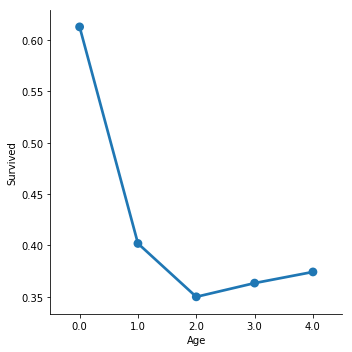

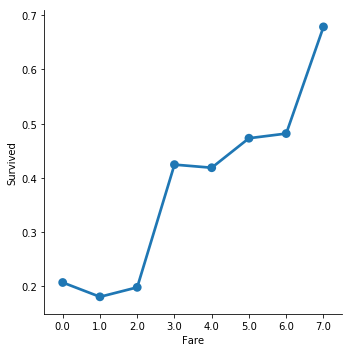

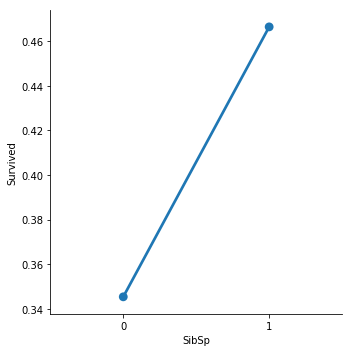

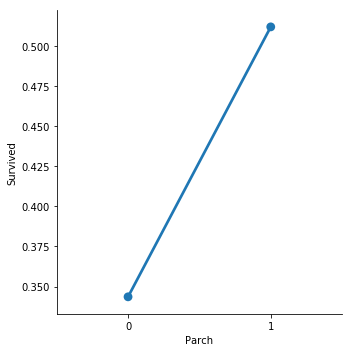

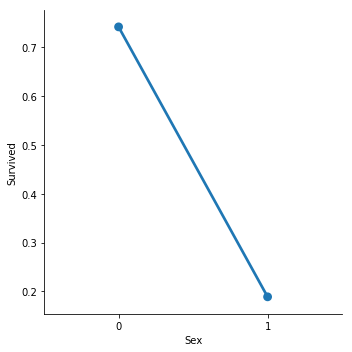

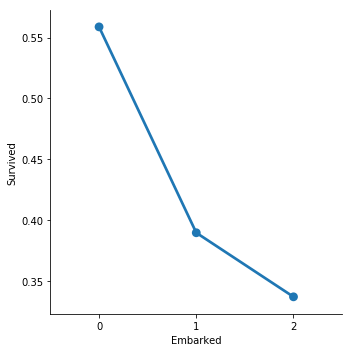

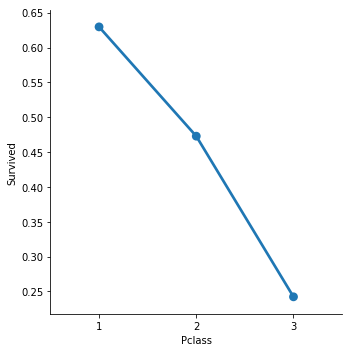

In [58]:
for feature in ["Age", "Fare", "SibSp", "Parch", "Sex", "Embarked", "Pclass"]:
    survival_rate(feature)


,Embarked,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,0.558824,1.876471,0.558824,2.594118,0.347059,0.264706,4.458824
1,1,0.389610,2.909091,0.532468,2.701299,0.233766,0.103896,1.467532
2,2,0.336957,2.350932,0.684783,2.448758,0.319876,0.248447,3.453416


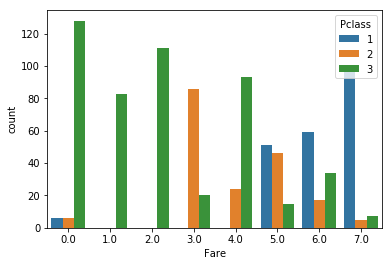

In [98]:
sns.countplot(x="Fare", data=train, hue="Pclass")

## Relationship between Embarked and other features
train.groupby(["Embarked"], as_index=False).mean()


In [60]:
x = train.drop("Survived", axis=1)
y = train["Survived"]


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=11)

In [91]:
x_train.shape, y_train.shape

((712, 7), (712,))

In [92]:
clf = DecisionTreeClassifier(random_state=11)

In [93]:
cvs = cross_val_score(clf,x,y,cv=5)
print(cvs)

[0.80446927 0.78212291 0.8258427  0.80337079 0.84180791]


In [94]:
print("Accuracy: %0.4f (+/- %0.4f)" % (cvs.mean(), cvs.std()*2))


Accuracy: 0.8115 (+/- 0.0410)


In [95]:
clf.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

In [96]:
acc_decision_tree = round(clf.score(x_train, y_train), 4)
print("Accuracy: %0.4f" % (acc_decision_tree))


Accuracy: 0.8919


In [ ]:
confusion_matrix(y_test,predictions)


In [75]:
predictions = clf.predict(x_test)

confusion_matrix(y_test,predictions)

array([[95, 11],
       [27, 46]], dtype=int64)

In [76]:
print("Precision: %0.4f" % precision_score(y_test, predictions))


Precision: 0.8070


In [77]:
print("Recall: %0.4f" % recall_score(y_test, predictions))

Recall: 0.6301


In [78]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.78      0.90      0.83       106
           1       0.81      0.63      0.71        73

   micro avg       0.79      0.79      0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [79]:
fp, tp, th = roc_curve(y_test, predictions)
roc_auc = auc(fp, tp)

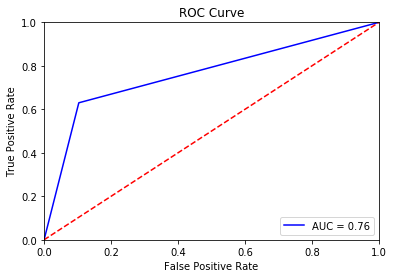

In [80]:
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [104]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# dtree = DecisionTreeClassifier()
# parameters = {'max_depth':[1,2,3],'min_sample':[2,3]}
# import pandas as pd
# grid_dtree = GridSearchCV(dtree, param_grid =parameters,cv=3, refit=True)
# grid_dtree.fit(x_train, y_train)

# #최적의 파라미터 정보확인
# score_df = pd.DataFrame(grid_dtree.cv_results_)
# score_df[['params','mean_test_score','rank_test_score','split()_test_score','split1_test_score','split2_test_score']]
# print('Optimal parameter:',grid_dtree.best_params_)
# print('Max accuracy:,{0:4f}'.format(grid_dtree.best_score_))




# #Cross validation 정확도:
# #Decision Tree Classifier arruracy: 

#grid_dtree 로 분석 하고 
# Max accuracy랑 Test datasets accuracy 를 구함

In [116]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
    confusion= confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test,pred)
    precision =precision_score(y_test,pred)
    recall= recall_score(y_test,pred)
    
    print('Confusion Matrixs')
    print(confusion)
    print("Accuracy:{0:.4f}, Precision:{1:.4f},Recall:{2:.4f}".format(accuracy,precision, recall))

In [117]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_titanic = pd.read_csv('C:/Users/dkfka/train.csv')
df_titanic.head(3)
df_y_titanic = df_titanic['Survived']
df_x_titanic = df_titanic.drop("Survived",axis=1)
df_x_titanic = transform_features(df_x_titanic)

x_train,x_test, y_train, y_test = train_test_split(df_x_titanic, df_y_titanic, test_size=0.20, random_state=11)

In [118]:
lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test,pred)

#threshold 값 을 조정하면서 --> recall과 precision의 비중을 결정함 

# precision_recall_curve()

Confusion Matrixs
[[108  10]
 [ 14  47]]
Accuracy:0.8659, Precision:0.8246,Recall:0.7705


C:\Users\dkfka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
print(y_test)

431    1
821    1
629    0
626    0
665    0
582    0
250    0
780    1
728    0
259    1
232    0
371    0
552    0
87     0
815    0
243    0
46     0
134    0
434    0
381    1
883    0
698    0
652    0
60     0
538    0
277    0
463    0
783    0
733    0
92     0
      ..
405    0
633    0
394    1
49     0
411    0
316    1
341    1
336    0
770    0
852    0
289    1
725    0
247    1
179    0
376    1
485    0
293    0
879    1
187    1
189    0
809    1
470    0
618    1
361    0
861    0
638    0
771    0
521    0
711    0
484    1
Name: Survived, Length: 179, dtype: int64


In [112]:
print(pred)

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1]
